# 課題0628

そのまま課題ファイルで編集しないでください。課題ファイルを複製してから課題を回答してください。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 課題１

- ```NumPy```を使って、最小二乗法で重回帰分析の係数を推定する関数を作成しよう。
- 与えられたデータで実装して動作を確認せよ。

In [18]:
def get_PartialRegressionCoefficient(X, Y):
    #先頭列にバイアスのための1を追加
    X = np.insert(X,0,1, axis=1)
    #線形予測子の計算
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    return beta 

In [19]:
# このコードを実行し、データの読み込み
# もしsklearnがインストールされていない場合は、!pip install sklearnを実行してください
from sklearn.datasets import load_iris
iris = load_iris()
# Irisデータセットをロード
iris = load_iris()
X = iris.data  # 説明変数のデータ
Y = iris.data[:, 1]  # 目的変数のデータ（がく片の幅）

beta:  [-5.52530244e-13 -3.74145159e-14  1.00000000e+00  9.25093335e-14
 -1.15157883e-13]
result:  [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8 3.3 2.7 3.  2.9 3.  3.  2.5 2.9
 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2
 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.  3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2
 3.3 3.  2.5 3.  3.4 3. ]


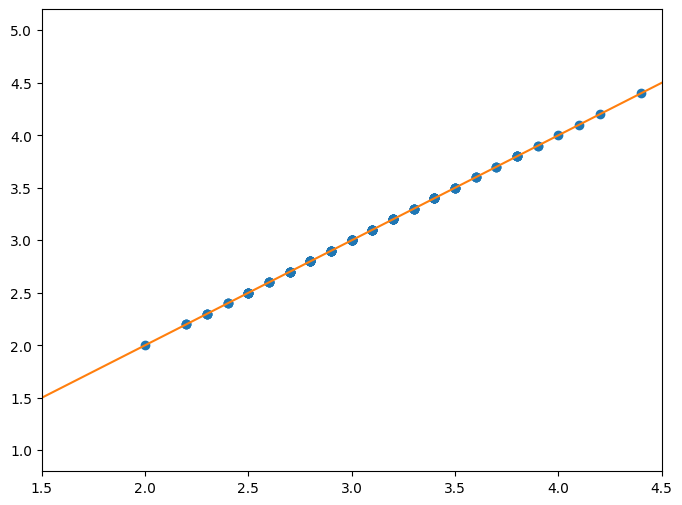

In [20]:
# Yを従属変数、Xを独立変数として、線形回帰モデルを作成し、回帰係数を求める
beta = get_PartialRegressionCoefficient(X, Y)
print("beta: ", beta)
X = np.insert(X,0,1, axis=1)
result = X @ beta
print("result: ", result)
plt.figure(figsize=(8, 6))
plt.xlim(1.5,4.5)
plt.plot(Y, result, linestyle='None', marker='o')
plt.plot(np.arange(1,6), np.arange(1,6))

## 課題2

以下の指示に従ってクラスを作成してください。

- クラスをインスタント化する際は二つ同じサイズの```ndarray```($v_1$と$v_2$)が渡されます
- クラスに$v_1$と$v_2$が同じサイズであるかどうかを確認するメソッドを実装しよう
- クラスに$v_1$が$v_2$に射影する結果を計算するメソッドを実装しよう
- クラスに$v_1$と$v_2$のコサイン類似度を計算するメソッドを実装しよう

In [9]:
class Vector():
    def __init__(self, v_1, v_2):
        self.v_1 = v_1
        self.v_2 = v_2
    
    def is_equal(self):
        return np.linalg.norm(self.v_1, ord=2) == np.linalg.norm(self.v_2,ord=2)
    
    def projection(self):
        return np.dot(self.v_1,self.v_2)/(np.linalg.norm(self.v_2,ord=2))**2 * self.v_2
    
    def cosinesimilarity(self):
        return np.dot(self.v_1,self.v_2)/np.linalg.norm(self.v_1,ord=2)/np.linalg.norm(self.v_2,ord=2)
    
        

In [10]:
# 確認
import numpy as np
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
vector = Vector(v1, v2)
print(vector.is_equal())
print(vector.projection())
print(vector.cosinesimilarity())

False
[1.66233766 2.07792208 2.49350649]
0.9746318461970762


# 以下、授業内課題

与えられた二つのサイズが (5,2) の配列の各要素は、二次元空間での位置を表しています。二つの配列における同じ行である要素で表示する点間のユークリッド距離を計算してください。

In [16]:
array1 = np.array([[1, 2],
                   [0, 4],
                   [5, 6],
                   [-2,2],
                   [3, 6]])

array2 = np.array([[6, 3],
                   [7, 0],
                   [5, 5],
                   [9, 1],
                   [5, 6]])


14.325086658252562


### 実践問題
特定のベクトル $v$ を他のベクトル$u$に射影する結果を計算しよう。

In [15]:
v = np.array([1,2])
u = np.array([3,4])

print(v,u)
x = np.dot(v,u)
print(x)
x = x/np.linalg.norm(u,2)
print(x)
x = x*u
print(x)

[1 2] [3 4]
11
2.2
[6.6 8.8]
